In [1]:
import numpy as np
from scipy.stats import bernoulli
#from scipy.ndimage.filters import uniform_filter1d
#For python3, it can be used like below, no need to add scipy.
from scipy.ndimage import filters
from scipy.stats import binom
import random
import math
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


## Maximum Likelihood Estimation
### The case of coin-flips
**Q1:** If we have a loaded coin, which shows 'H' with probability $\theta = 0.6$, then how can we simulate $100$ flips of this coin?

A1.1: Let's start with the most simple case, where we manually apply $100$ iterations and flip the coin & save the outcome each time.

In [2]:
np.random.seed(15) #a fixed random seed so that everyone gets the same results
a = np.zeros(100) #a lot of zeros. returns a new array of shape and type, filled with zeros
for i in range(100):
    flip = np.random.uniform(0,1) #sample a probability uniformly from (0,1), Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high)
    if flip <= 0.6: #if the sampled value is less than 0.6, then head comes, which happens 60% of the time
        a[i] = 1    #we see "H"!!

In [3]:
#Now let's see some basic statistics from our sequence
print("The fraction of Heads we see is", np.mean(a))

The fraction of Heads we see is 0.69


Isn't it interesting that normally $\theta = 0.6$, but when we estimate it from the sample, it is $\hat{\theta} = 0.69$? We will investigate this soon!

A1.2: We can actually simplify the above code

In [4]:
np.random.seed(15) #a fixed random seed so that everyone gets the same results
a = np.zeros(100) #a lot of zeros
for i in range(100):
    a[i] = bernoulli.rvs(0.6) #this will generate a value of "1" with probability 0.6, and "0" otherwise. RVS=random value sample

In [5]:
print("The fraction of Heads we see is", np.mean(a))

The fraction of Heads we see is 0.69


A1.3: We can actually do it in a single line! Almost all the statistical functions in Python scale with a parameter.

In [6]:
np.random.seed(15) #a fixed random seed so that everyone gets the same results
a = bernoulli.rvs(0.6, size = 100) #generate 100 flips where each flip comes "H" with 0.6 probazbility, and "0" o.w.

In [7]:
print("The fraction of Heads we see is", np.mean(a))

The fraction of Heads we see is 0.69


**Q2:** How do we explain the fact that the fraction Heads is $\hat{\theta} = 0.69$ while $\theta = 0.6$?

A.0: There is always a non-zero probability that $\hat{\theta}$ is away from $\theta$ by an amount of, e.g., $\pm 0.02$. However, if we keep flipping more and more coins, this probability will get very close to $0$, and if we flip millions of coins, seeing $|\hat{\theta} - \theta | > 0.02$ will be more unlikely than being hit by a lightning!

A.1: Let's first analyze this is indeed correct:

In [8]:
np.random.seed(15) #a fixed random seed so that everyone gets the same results
a = bernoulli.rvs(0.6, size = pow(10,6)) 
print("The fraction of Heads we see is", round(np.mean(a),4))
print(a[:100])

The fraction of Heads we see is 0.5997
[0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1]


A.2: Let us denote $\hat{\theta}(n)$ as our estimation for $\theta$ when we see the outcomes of $n$ coin tosses. Plotting $\hat{\theta}(n)$ over $n = 1,\ldots, 10^3$ will give us how the ratio converges to $\theta$. We are empirically observing the law of large numbers.

In [9]:
#[Jing]: arange = Return an array with evenly spaced values within a given interval
# cumsum = Return the cumulative sum of the elements along a given axis.

ratios = np.cumsum(a) / (np.arange(1,pow(10,6)+ 1)) #running ratios with cumulative average. ratios[10] would give us hat_theta(9)
print(np.arange(1,pow(10,6)+ 1))
print(ratios[:100])

[      1       2       3 ...  999998  999999 1000000]
[0.         0.5        0.66666667 0.75       0.8        0.83333333
 0.85714286 0.875      0.88888889 0.9        0.81818182 0.83333333
 0.76923077 0.71428571 0.66666667 0.6875     0.70588235 0.72222222
 0.73684211 0.75       0.71428571 0.72727273 0.69565217 0.70833333
 0.72       0.69230769 0.7037037  0.71428571 0.72413793 0.73333333
 0.74193548 0.75       0.72727273 0.73529412 0.71428571 0.69444444
 0.7027027  0.71052632 0.71794872 0.725      0.73170732 0.73809524
 0.74418605 0.72727273 0.73333333 0.73913043 0.74468085 0.75
 0.73469388 0.74       0.7254902  0.73076923 0.73584906 0.72222222
 0.72727273 0.71428571 0.70175439 0.70689655 0.71186441 0.71666667
 0.72131148 0.72580645 0.71428571 0.71875    0.72307692 0.71212121
 0.71641791 0.70588235 0.69565217 0.7        0.69014085 0.69444444
 0.69863014 0.7027027  0.69333333 0.68421053 0.68831169 0.69230769
 0.6835443  0.675      0.67901235 0.68292683 0.68674699 0.69047619
 0.68235294 0.

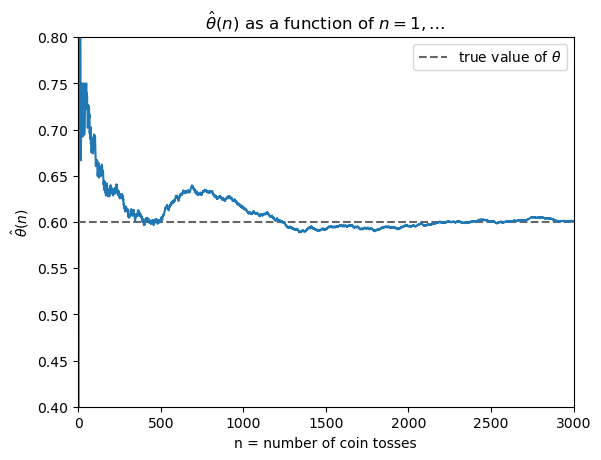

In [10]:
plot_limit = 3000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1) 
y = ratios[:plot_limit]
plt.title(r"$\hat{\theta}(n)$ as a function of $n=1,\ldots$") 
plt.xlabel("n = number of coin tosses") 
plt.ylabel(r"$\hat{\theta}(n)$") 
plt.axhline(y = 0.6, color = 'k', linestyle='--', alpha = 0.6, label = r"true value of $\theta$")
plt.plot(x,y) 
plt.xlim(-5,plot_limit)
plt.ylim(0.4,0.8)
plt.legend()
plt.show()

**Q3:** If we iterate the same experiment (of tossing a loaded coing $100$ times) again and again, say $2,000$ times, do we expect more-or-less a $0.69$ fraction of Heads each time? 

A: No! That was only the first experiment. The second one can give less than $0.6$ fraction. Let's see now.

In [11]:
np.random.seed(15) #a fixed random seed so that everyone gets the same results
for i in range(5):
    a = bernoulli.rvs(0.6, size = 100)
    print("Experiment #", i+1, ": hat_theta =", np.mean(a))
print("When we average all of these until 2,000-th experiment, we will get ~0.6!")

Experiment # 1 : hat_theta = 0.69
Experiment # 2 : hat_theta = 0.58
Experiment # 3 : hat_theta = 0.56
Experiment # 4 : hat_theta = 0.56
Experiment # 5 : hat_theta = 0.62
When we average all of these until 2,000-th experiment, we will get ~0.6!


**Q4:** In the previous answer, do we really need to sample from a Bernuolli distribution each time? Or is there a simpler way?

A: There is indeed a simpler way. Recall that the number of "H" outcomes in "$n$" tosses of a coin is actually a Binomial distribution! So here it is:

In [12]:
print("I am easily simulating an example of 100 coin tosses and the number of 'H' is:",  binom.rvs(100, 0.6))

I am easily simulating an example of 100 coin tosses and the number of 'H' is: 57


In [13]:
print("I am doing the same, but this time repeating my experiment three times and here are the results",  binom.rvs(100, 0.6, size = 3))

I am doing the same, but this time repeating my experiment three times and here are the results [65 75 68]


### Let's play a game!

In [14]:
np.random.seed(85) #a fixed random seed so that everyone gets the same results
magic_number = np.random.uniform(0,1) #do not print this number
sequence = bernoulli.rvs(magic_number, size = 200)

**Q5:** An adversary gives you a sequence of coin tosses ```sequence```. He tells you that he obtained this number by flipping his 'possibly loaded' coin $200$ times. Assume he did not change the coin during the flipping process, and there is indeed one coin. He tells you that there is a ```magic_number``` which is the true value of $\theta$, but you cannot look at this number. He asks you "I will toss the coin $1,000$ times. Each time "H" comes, you will win \\$ 60, but each time "T" comes, you will lose \\$ 120. Would you take it?"

A: Hmm... You will lose $120$ but only make $60$... Why should you even take it? But wait. How many "H"'s came last time?

In [15]:
print("There were", np.sum(sequence),"many H's in the given sequence.")

There were 138 many H's in the given sequence.


Then, you remember that in the class you learned the MLE estimate of the true $\theta$ (i.e., the probability of Heads will come) is actually proportional to the number of H's you see in this sequence. In other words:

In [16]:
hat_theta = np.mean(sequence)
print("The MAXIMUM LIKELIHOOD, i.e., the best-estimation of the true theta is", hat_theta)

The MAXIMUM LIKELIHOOD, i.e., the best-estimation of the true theta is 0.69


Then, now that you estimated ```hat_theta``` you simulate what will happen by writing a code:

In [17]:
np.random.seed(85)
flips = bernoulli.rvs(hat_theta, size = 1000) #flipping a coin
total_money = np.sum(flips*60 - (1-flips)*120) #try to understand why this step is correct
print("Hmm, you will make $", total_money, "! Nice.")

Hmm, you will make $ 3120 ! Nice.



You just simulated and saw that if you take this game, then you will make profit. But then, you are not really sure if this is accurate, and simulate this experiment many times. You will then take the average!

In [18]:
number_of_simulations = 10000 #you simulate this much
simulations = np.zeros(number_of_simulations)
for sim in range(number_of_simulations):
    flips = bernoulli.rvs(hat_theta, size = 1000) #flipping a coin
    simulations[sim] = np.sum(flips*60 - (1-flips)*120) 
print("Even in multiple simulations, in average you make $", np.mean(simulations), "! Nice.")

Even in multiple simulations, in average you make $ 4203.942 ! Nice.


Did we overkill by simulating? We know that when we play this game one round, our expected profit is:
$$\begin{align}
\mathbb{E}[\text{profit}] &=  \mathbb{E}[\text{profit} | H]\cdot\theta + \mathbb{E}[\text{profit} | T]\cdot(1 - \theta)  \\
& = 60 \theta - 120 (1 - \theta).
\end{align}$$
But we don't know $\theta$ so our estimation is:
$$\begin{align}
\mathbb{E}[\text{estimated profit}] &= 60 \hat{\theta} - 120 (1 - \hat{\theta}) \\
& = 60 \cdot 0.69 - 120 \cdot 0.31 
& = 4.2
\end{align}$$
Hence, when we play this game for $1,000$ times, we will make an expected $\$4,200$! So our previous simulation was close to this number, but we did not need to simulate!

We agree to play this game, and the game starts.

In [19]:
np.random.seed(15)
flips = bernoulli.rvs(magic_number, size = 100) #flipping a coin
np.sum(flips*60 - (1-flips)*120) 

780

We started making money in the first $100$ rounds! Let's wait until the game is finished.

In [20]:
np.random.seed(15)
flips = bernoulli.rvs(magic_number, size = 1000) #flipping a coin
profit = np.sum(flips*60 - (1-flips)*120) 

In [21]:
print("Overall, our profit is $", profit)
print("This shows we actually lost money.")

Overall, our profit is $ -5880
This shows we actually lost money.


The adversary reveals the true value of $\theta$:

In [22]:
print("The true value of theta, which we estimated as", hat_theta, "is:", round(magic_number,2))

The true value of theta, which we estimated as 0.69 is: 0.62


We see that the reason why we lost money is actually because the sequence that was given to us was actually not very representative of the truth. So a couple of questions:
1. What if the adversary gave you a sequence of $1,000,000$ coin tosses? Would you be more/less confident about playing this game?  
2. How would you explain this game when the given sequence has only $1$ coin toss? 
3. Please explain why MLE is favorable even in the studied case above?

In [24]:
#[Jing]
#What if the adversary gave you a sequence of  1,000,000 coin tosses? Would you be more/less confident about playing this game?

np.random.seed(15)
flips = bernoulli.rvs(magic_number, size = 1000000) #flipping a coin
profit = np.sum(flips*60 - (1-flips)*120) 

print("Overall, our profit is $", profit)
print("This shows we actually lost money.")

Overall, our profit is $ -8367960
This shows we actually lost money.
